<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272560 entries, 0 to 272559
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ride_id        272560 non-null  object 
 1   rideable_type  272560 non-null  object 
 2   day_of_week    272560 non-null  int64  
 3   ride_length    272560 non-null  int64  
 4   start_lat      272560 non-null  float64
 5   start_lng      272560 non-null  float64
 6   end_lat        272560 non-null  float64
 7   end_lng        272560 non-null  float64
 8   member_casual  272560 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 18.7+ MB
              ride_length                                              \
day_of_week             1          2          3          4          5   
member_casual                                                           
casual          24.851005  19.857026  19.530124  17.052512  20.579618   
member          12.945872  10.905671  10

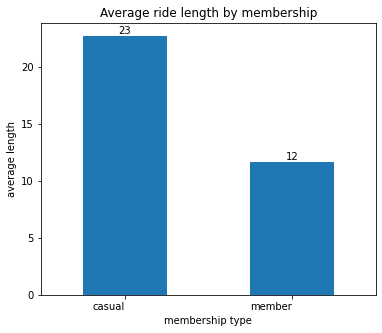

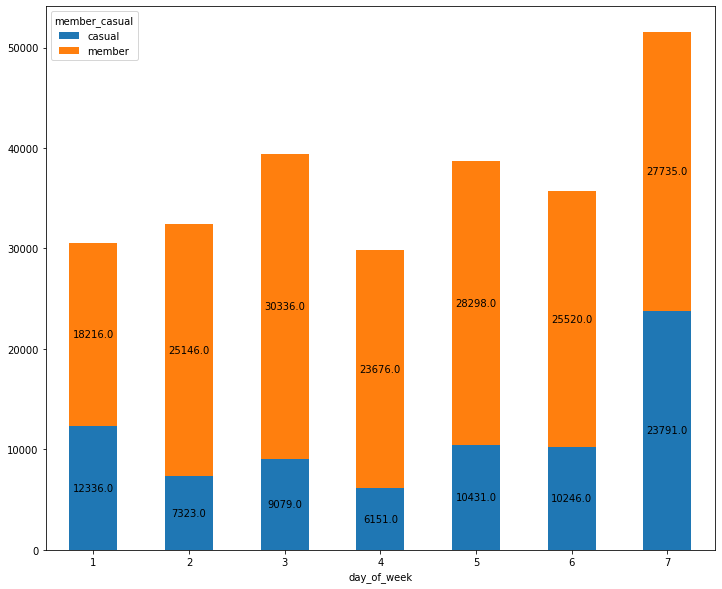

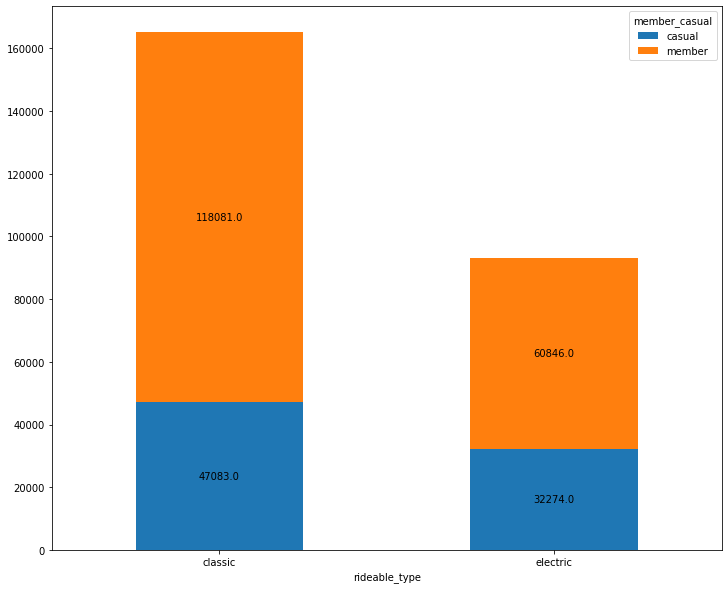

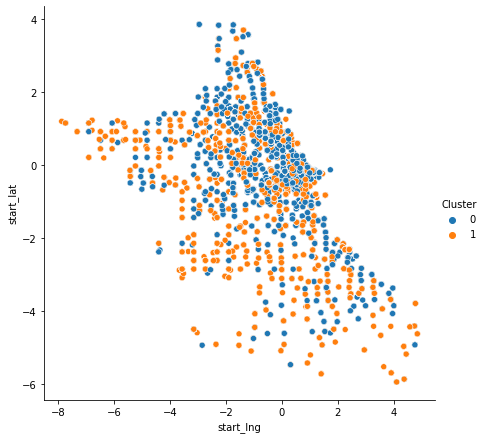

In [1]:
__author__ : 'Bing Xian'
name: "Google Analytics capstone project"
date: "14th May 2022"
    
'''install the relevant packages used
   Ensure that packages are updated and on the latest version'''


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#import csv file
ride_df = pd.read_csv('riderData_python_v1.csv')

#####

#####################explore the data - descriptive statistics#####################

## The most number of rides occurs on a saturday
ride_df.head()
ride_df['ride_length'].mean()
ride_df['day_of_week'].mode()
ride_df['ride_length'].min()
ride_df['ride_length'].max()
ride_df.info()

#####################explore the data - validate data##################################

## ride_length needs to be greater than zero otherwise, it could mean that the bike was either docked
## or under maintenace. 

ride_df = ride_df[(ride_df['ride_length'] > 0)]

ride_df = ride_df[ride_df['rideable_type'].str.contains('docked')==False]

#####################explore the data  - Data visualizations ##################################


## Gives us the average ride length by membership type 

average_membership = ride_df['ride_length'].groupby(ride_df['member_casual']).mean()

ax = average_membership.plot(kind = 'bar', title = 'Average ride length by membership', ylabel = "average length",
                       xlabel = "membership type", figsize = (6,5))

ax.set_xticklabels(ax.get_xticklabels(), rotation=360, ha='right')

## The average ride length of users who are causal memer is 25.71 
## while those who have an annual membership is 11.575

plt.bar_label(ax.containers[0],fmt='%.0f')

## The following table tells us the average ride_length by membership type 
## for each day of the week

df_ride_length = ride_df[['ride_length','member_casual','day_of_week']]
                         
table = pd.pivot_table(data=df_ride_length,index=['member_casual'],columns=['day_of_week'])
print(table)

## The following grpah shows the number of riders by membership type for each day of the week

df_plot = ride_df.groupby(['day_of_week','member_casual']).size().reset_index().pivot(columns='member_casual',index = 'day_of_week',values = 0)

ax = df_plot.plot(kind='bar', stacked=True, figsize = (12,10), rot = 0)

# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
    
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
    
## We can also have a look at whether electric or classic bikes are more popular amongst the users 
df_plot2 = ride_df.groupby(['rideable_type','member_casual']).size().reset_index().pivot(columns='member_casual',index = 'rideable_type',values = 0)

ax = df_plot2.plot(kind='bar', stacked=True, figsize = (12,10), rot = 0)

# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
    
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

##################### K-means clustering ##################################

## Binarize member data

def binarize_member(data):
    if data == "member":
        return 1
    else:
        0
        
ride_df_ml = ride_df.copy()
        
## Perform scaling as binary values and location data are on a different scales
ride_df_ml['member_casual'] = ride_df_ml['member_casual'].apply(lambda x: 1 if x == "member" else 0 ) 

ride_df_ml = ride_df_ml[['member_casual','start_lat','start_lng']]

ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(ride_df_ml),columns = ride_df_ml.columns)

X = df_scaled.loc[:, ['member_casual', "start_lat", "start_lng"]]
X.head()

kmeans = KMeans(n_clusters=2)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

## A scatterplot which shows the geographic distribution of where riders who are members are
## we observe that members are mostly located in inner suburbs rather than coastal suburbs
## Marketing could plan to increase campaigns to convert bike share users in the coastal areas.

sns.relplot(
    x="start_lng", y="start_lat", hue="Cluster", data=X, height=6,
);

##################### End #####################